# How to produce gene set scores (like in the Pancancer immune paper).

David L Gibbs,
Jan 7, 2019
dgibbs (( at )) systemsbiology (( dot )) org

The first thing we need to do: download the Pancancer TCGA expression set.

It can be found at:  http://api.gdc.cancer.gov/data/3586c0da-64d0-4b74-a449-5ff4d9136611

I'm going to download it and put in the same folder as this notebook. It can take a while since it's 1.8 GBs

In [18]:
library(readr)
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

In [2]:
dat <- read_tsv('EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv')

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.


In [7]:
dat[1:5,1:5]
dim(dat)

gene_id,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07
?|100130426,0.0000,0.0000,0.0000,0.0000
?|100133144,3.2661,2.6815,1.7301,0.0000
?|100134869,3.9385,8.9948,6.5650,1.5492
?|10357,149.1350,81.0777,86.4879,53.9117
?|10431,2034.1000,1304.9300,1054.6600,2350.8900


[1] 20531 11070

In [4]:
# then let's get all the genes we need, 
# can remove the rest to save memory
load('Immune-Subtype-Clustering/shiny-app/Immune-Subtype-Clustering/data/comparative_immuneSigs_geneLists4.rda')

sigs1_2_geneIDs2<-as.character(na.omit(sigs1_2_eg2[[1]]$probe))
for(i in 2:length(sigs1_2_eg2)){
  sigs1_2_geneIDs2<-c(sigs1_2_geneIDs2,as.character(na.omit(sigs1_2_eg2[[i]]$probe)))
}
sigs1_2_geneIDs2<-unique(sigs1_2_geneIDs2)   ## 2652 unique
length(sigs1_2_geneIDs2)

[1] 2652

* We have gene symbols and entrez IDs in that first column, so we'll need to split them up. *

In [6]:
geneList <- strsplit(dat$gene_id, '\\|')
geneSymbols <- unlist(lapply(geneList, function(a) a[[1]]))                             
geneSymbols[5000:5005]
length(geneSymbols)

[1] "DLGAP2" "DLGAP3" "DLGAP4" "DLGAP5" "DLK1"   "DLK2"

[1] 20531

In [13]:
# let's work on a subset of the data, and compare to the reported scores #

# first to remove some duplicate symbols '?' and 'SLC35E2'
idx <- which(geneSymbols == 'SLC35E2')
geneSymbols[idx[2]] <- 'SLC35E2_2'

jdx <- which(geneSymbols %in% sigs1_2_geneIDs2)
gs2 <- geneSymbols[jdx]

# then make a smaller data set and give it row names
datSubset <- as.data.frame(dat[jdx,-1]) #  sample(x = 1:ncol(dat), size = 1000, replace = F)]) 
rownames(datSubset) <- gs2

# just to have a look
dim(datSubset)
datSubset[1:5,1:5]


[1]  2316 11069

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07
A1CF,0.0000,0.000,0.5925,1.5492,0.000
ABCA1,319.4040,1071.800,896.4600,310.6120,800.283
ABCA8,4.3228,121.997,1368.6900,982.1840,5000.650
ABCB11,0.4803,0.000,1.7775,0.0000,0.000
ABCB1,1052.3500,2837.340,18921.0000,213.0130,3639.270


In [14]:
rm(dat)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,672622,36.0,2006888,107.2,6124538,327.1
Vcells,29033746,221.6,388845388,2966.7,477528749,3643.3


In [22]:

# apply the transforms #
# first the log2
datSubsetTransformed <- apply(datSubset, 2, function(a) log2(a+1))

dim(datSubsetTransformed)
                              
# then the median scale
datSubsetTransformed <- t(apply(datSubsetTransformed, 1, function(a) a - median(a, na.rm=T)))
                              
dim(datSubsetTransformed)

[1]  2316 11069

[1]  2316 11069

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.0100  -1.8792  -0.6182  -0.7532   0.2819  13.0601 

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07
A1CF,0.00000000,0.0000000,0.67129337,1.3500446,0.0000000
ABCA1,-1.52197534,0.2214417,-0.03601986,-1.5621167,-0.1995556
ABCA8,-3.59507070,0.9352233,4.41237763,3.9340616,6.2809323
ABCB11,0.06457784,-0.5013117,0.97247516,-0.5013117,-0.5013117
ABCB1,3.42077374,4.8508363,7.58778154,1.1215592,5.2098343


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,875975,46.8,2006888,107.2,6124538,327.1
Vcells,55044955,420.0,199088838,1519.0,477528749,3643.3


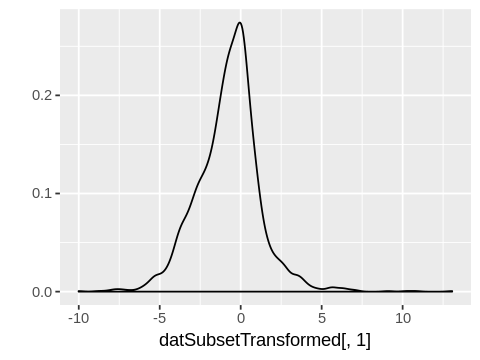

In [24]:

qplot(datSubsetTransformed[,1], geom='density')
                         
summary(datSubsetTransformed[,1])
                              
datSubsetTransformed[1:5,1:5]
                              
gc()

* Now I'm going to download the code from my github account. It contains everything we should need to produce scores.

* In a terminal, after changing directories to where the above data is located I'm going to clone the repo

git clone https://github.com/Gibbsdavidl/Immune-Subtype-Clustering

* I'm going to pull the code out from the files found in the Scripts/ directory

In [25]:

# and we use the scoring code to produce scores #

source('Immune-Subtype-Clustering/Scripts/ImmuneSigs68_function.R')
scores <- ImmuneSigs_function(datSubsetTransformed, 
                              sigs1_2_eg2,
                              sigs12_weighted_means,
                              sigs12_module_weights,
                              sigs1_2_names2,
                              sigs1_2_type2)


[1] "DONE MEAN"
[1] "DONE MEDIAN"
[1] "DONE WEIGHTED MEAN"
[1] "DONE MODULES"
GP11_Immune_IFN 
[1] "DONE ZHANG"
[1] "DONE KEGG"
[1] "DONE CD8 RATIO"
[1] "DONE TAMsurr"
[1] "DONE CHANG CORE"
CSR_Activated_15701700 
[1] "DONE CSR"
B_cell_PCA_16704732 
CD8_PCA_16704732 
GRANS_PCA_16704732 
LYMPHS_PCA_16704732 
T_cell_PCA_16704732 
TGFB_PCA_17349583 
Rotterdam_ERneg_PCA_15721472 
HER2_Immune_PCA_18006808 
[1] "DONE PCA"
[1] "DONE DONE"


In [26]:
scores[1:5,1:5]


,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07
ICS5_score,-3.0483,-2.2158,-1.4251,-3.0353,-1.8994
LIexpression_score,-2.5238,-1.6456,-3.5109,-2.8043,-1.4804
Chemokine12_score,-3.7070,-1.5382,-4.3160,-4.8156,-2.7848
NHI_5gene_score,-3.4825,-3.3908,-3.1136,-3.0228,-2.4796
CD68,-2.0609,-1.5780,-1.9953,-2.9355,0.0397


### Now we can compare this to the reported scores. ###

The reported signature scores can be found on our iAtlas synapse page:
https://www.synapse.org/#!Synapse:syn10337516/files/

I'm going to download them and put them in the same directory as this notebook.

In [27]:
reportedScores <- read.table('Scores_160_Signatures.tsv', header=T, sep='\t', stringsAsFactors = F)

In [28]:
reportedScores[1:5,1:5]


,Source,SetName,TCGA.02.0047.01A.01R.1849.01,TCGA.02.0055.01A.01R.1849.01,TCGA.02.2483.01A.01R.1849.01
Angiogenesis,Yasin,Angiogenesis,0.1925055,0.09855802,0.2027224
APM1,Yasin,APM1,0.4492857,0.46742753,0.4380520
APM2,Yasin,APM2,0.2437349,0.29939846,0.2658848
ICS5_score,Wolf,ICS5_score,-1.5192000,0.61780000,-2.0130000
LIexpression_score,Wolf,LIexpression_score,-1.8586000,-0.73840000,-1.2881000


* Of course!  The column names have dots.  Have to fix that.

In [29]:
library(stringr)
x <- str_replace_all(colnames(reportedScores), pattern='\\.', replacement='-')
colnames(reportedScores) <- x

# did we get them matched?
sum(colnames(scores) %in% colnames(reportedScores))

# close  <crying face emoji>

[1] 9129

In [30]:
# 
# Then we need to get these into a comparible form #
#

sharedIDs <- intersect(colnames(reportedScores), colnames(scores))
genesets  <- intersect(reportedScores$SetName, rownames(scores))
length(sharedIDs)
length(genesets)

scores2 <- scores[genesets,sharedIDs]
reportedScores2 <- reportedScores[genesets,sharedIDs]

dim(scores2)
dim(reportedScores2)

scores2[1:5,1:5]

reportedScores2[1:5,1:5]

[1] 9129

[1] 67

[1]   67 9129

[1]   67 9129

,TCGA-02-0047-01A-01R-1849-01,TCGA-02-0055-01A-01R-1849-01,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01
ICS5_score,-2.2016,0.8819,-2.9135,-0.9992,-1.3254
LIexpression_score,-2.7355,-1.1391,-1.9080,-1.7472,-0.2740
Chemokine12_score,-2.4945,0.3929,-1.9046,-0.6709,-0.2565
NHI_5gene_score,-1.1316,-1.1118,-1.4468,0.1813,-0.2275
CD68,0.6443,1.6091,0.7799,-0.7140,2.2676


,TCGA-02-0047-01A-01R-1849-01,TCGA-02-0055-01A-01R-1849-01,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01
ICS5_score,-1.5192,0.6178,-2.0130,-0.6860,-0.9120
LIexpression_score,-1.8586,-0.7384,-1.2881,-1.1057,-0.1263
Chemokine12_score,-1.7224,0.2789,-1.3137,-0.4585,-0.1713
NHI_5gene_score,-0.1660,0.4680,-0.3830,0.8730,1.3250
CD68,0.4500,1.1190,0.5440,-0.4910,1.5750


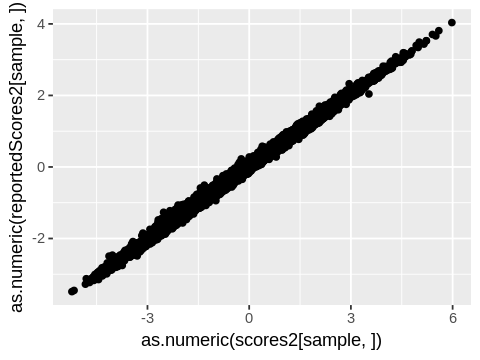

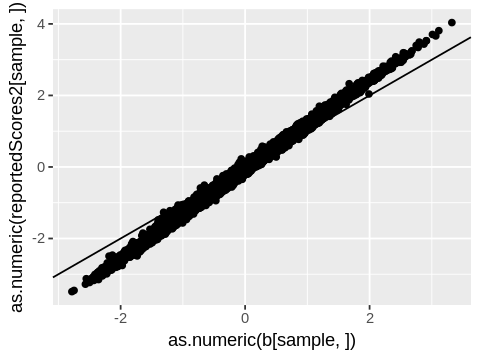

In [37]:
sample <- 2

# comparing the raw computed scores with reported scores #
qplot(x=as.numeric(scores2[sample,]), y=as.numeric(reportedScores2[sample,])) 

zscore.rows2<-function(x){
  return(t(apply(x, 1, function(x) (x - median(na.omit(x)))/sd(na.omit(x)))))
}


# now let's apply the sample-level normalization #
b <- zscore.rows2(scores2)
                  
# and replot #
qplot(x=as.numeric(b[sample,]), y=as.numeric(reportedScores2[sample,])) + geom_abline()
                  


Looks like that's pretty close.  When I've seen deviations from y=x, it's been from using a different sample group, which shifts things in the normalizations.

So, the moral of the story is that the reported signature scores depended on median scaling *for each gene* across the 9129 samples.  It wasn't the samples that were median scaled. 
